In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X=dataset.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [7]:
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression()

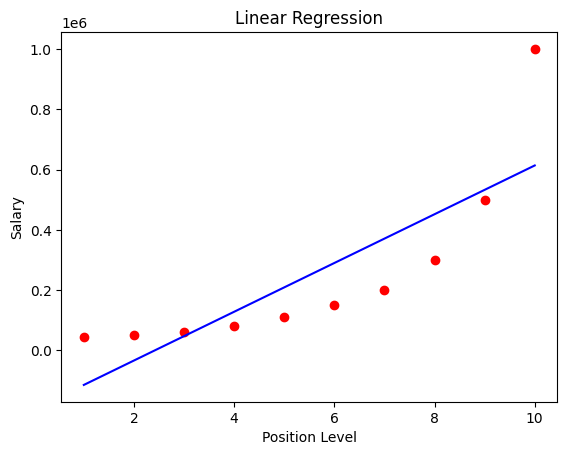

In [8]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

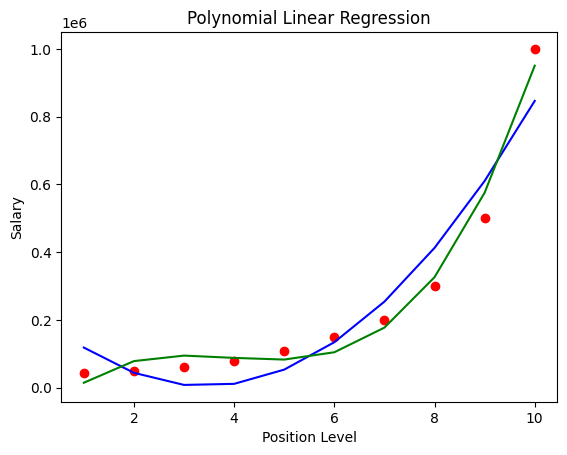

In [9]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Polynomial Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [10]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [11]:
lin_reg_2.predict(poly_reg2.fit_transform([[6.5]]))

array([189498.10606061])

In [12]:
lin_reg_3.predict(poly_reg3.fit_transform([[6.5]]))

array([133259.46969697])

# Lets code More

https://www.kaggle.com/datasets/aidaeinabadi/realestate

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [15]:
data= pd.read_csv('https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Real%20estate.csv')
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [16]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [17]:
data.shape


(414, 8)

In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [19]:
data.corr()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

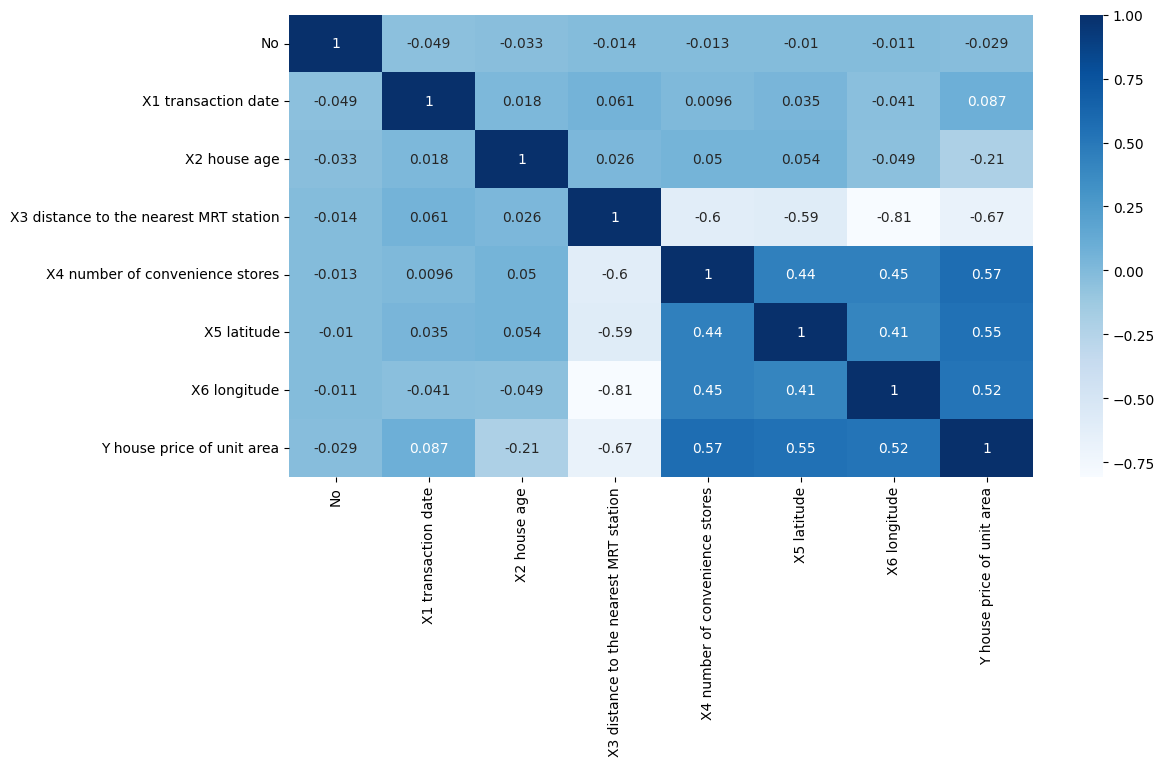

In [20]:
plt.subplots(figsize=(12, 6))
sns.heatmap(data.corr(),annot=True, cmap="Blues",)

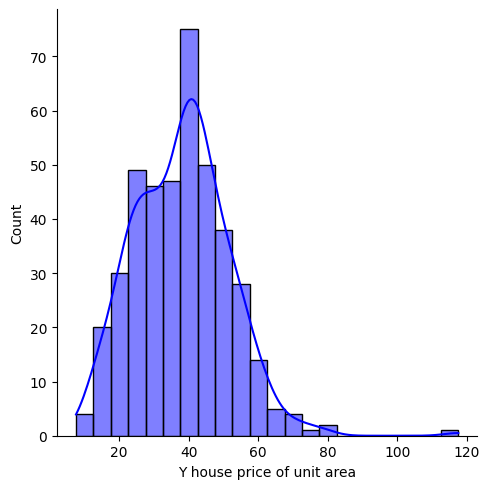

In [21]:
sns.displot(data=data, x='Y house price of unit area', kde=True , color='b')

In [22]:
X= data.drop('Y house price of unit area',axis=1)

X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [23]:
y= data['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [24]:
polynomial_reg= PolynomialFeatures(degree=2, include_bias=False)

In [25]:
poly_feat=polynomial_reg.fit_transform(X)
poly_feat.shape

(414, 35)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=101)

In [27]:
polymodel=LinearRegression()

In [28]:
polymodel.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred=polymodel.predict(X_test)

In [30]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
176,19.2,16.382290,2.817710
347,11.2,3.929467,7.270533
307,24.7,17.438173,7.261827
299,46.1,47.146074,-1.046074
391,31.3,27.340929,3.959071


In [31]:
Poly_MAE = metrics.mean_absolute_error(y_test,y_pred)
Poly_MSE = metrics.mean_squared_error(y_test,y_pred)
Poly_RMSE = np.sqrt(Poly_MSE)

pd.DataFrame([Poly_MAE, Poly_MSE ,Poly_RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,4.490908
MSE,32.402925
RMSE,5.692357
